<a href="https://colab.research.google.com/github/almazav/Masters-Project/blob/main/GNN_course1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Representation

Graph data is structred data: relation between data.<br> Nodes: data points.<br>
Edges: conection between data.<br>Features: aditional information that each node has.<br>
### Types 
Directed Graph:how nodes are conected, represented with an arrow.<br>
Undirected Graph: symetric, nodes are conected with each other.<br> Homegenous nodes are the same.<br> Heterogenous> nodes are different
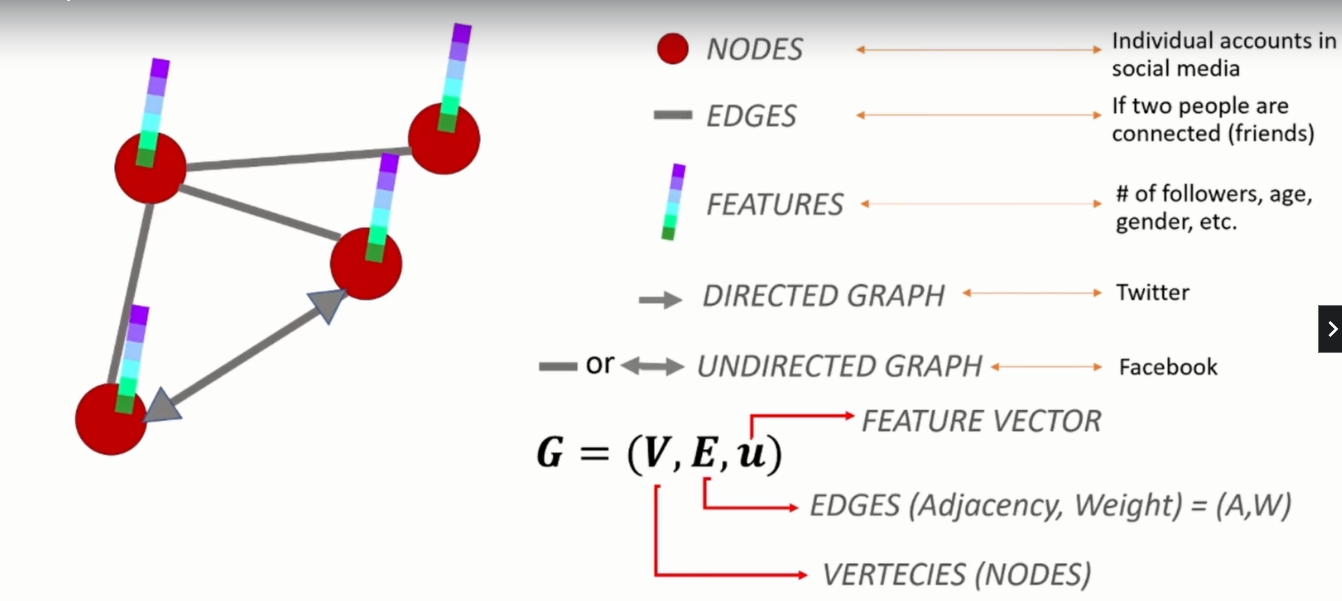

# Storing Graph information
* Label nodes
* Edge list: node coneteced to other node [(0,1),(0,3)...]
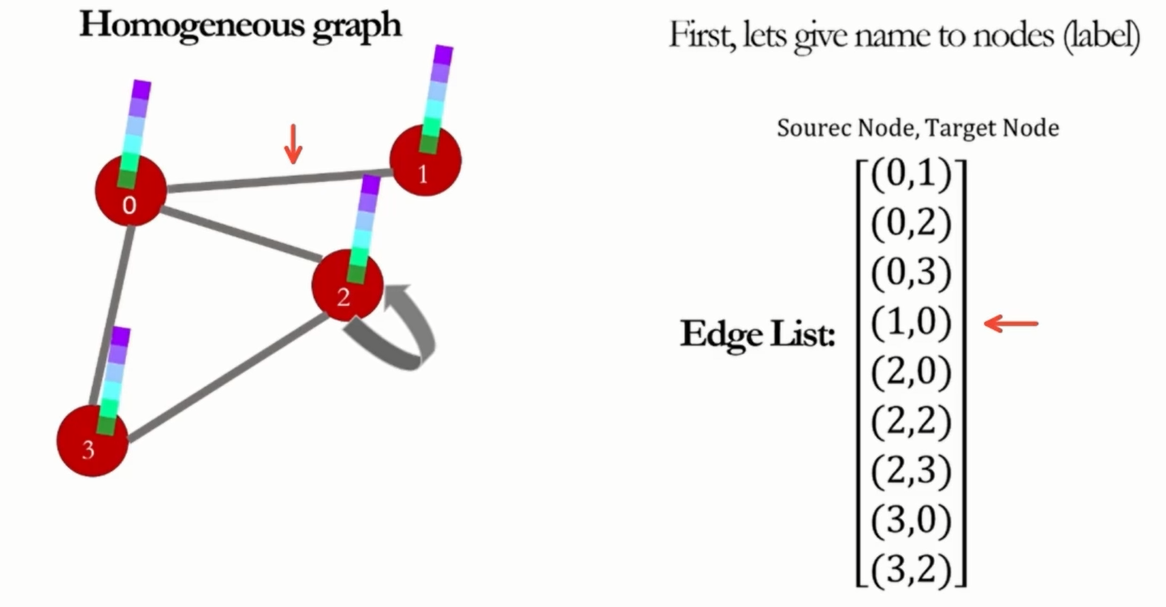

* Adjacency Matrix
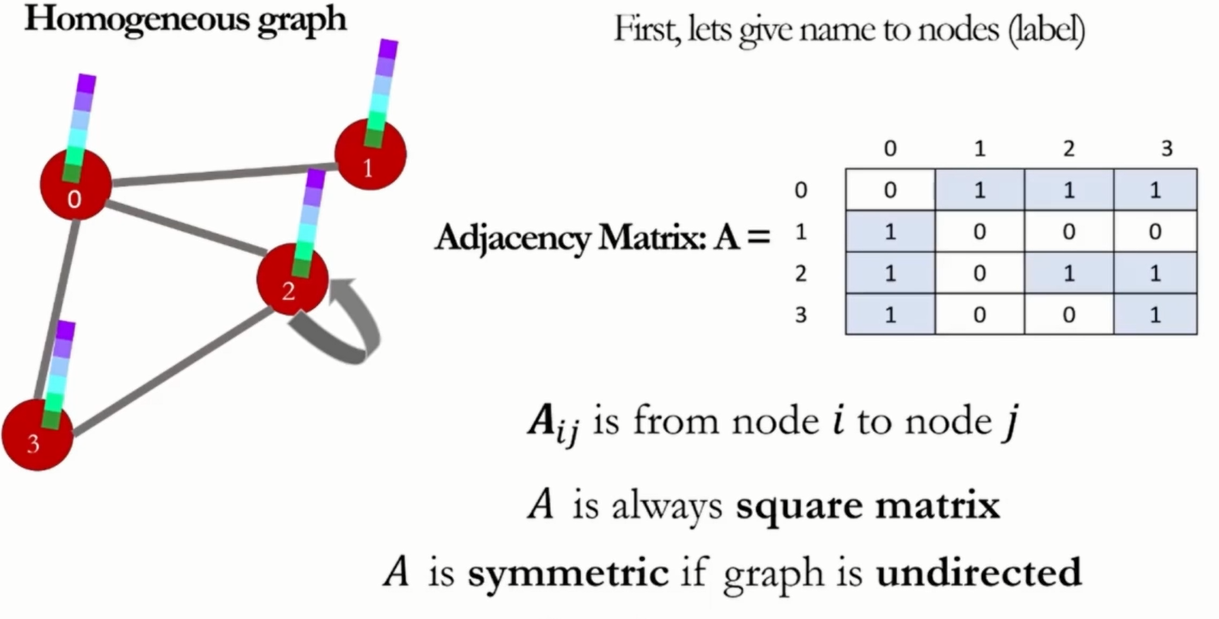

* Weight Matrix:conection Strenght
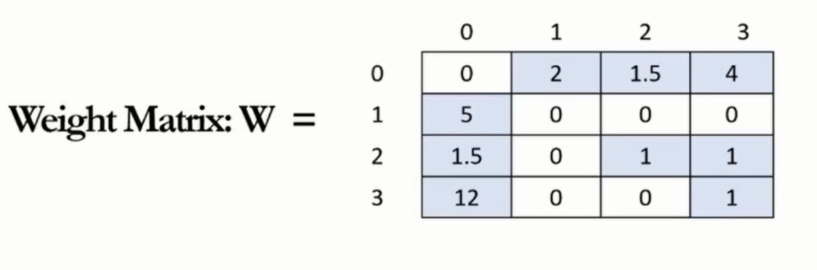

# Graph Degree and Laplacian
The degree matrix <b>(D)</b> is a diagonal matrix defining number of connections per node. Sum of the rows of <b> A</b> and insert in diagonal of <b>D</b><br>
The Laplacian <b>L</b> is given by: $L = D-A$ or $L =D-W$><br>
# Models
* Nodes Predictions
* Link Prediction(edge prediction)
* Graph Prediction.

In order to get a simpler data structure each node is mapped into an embedding space(Enode ENC)<br> noode $u$ -> $ENC(u)$ -> $Z_u$<br> The goal is to preserve the similarity ($S$): $S_G(u) ≈S_E(Z_u)$
### Encode
Decoder(DEC) function that describe the similarity of nodes in an embedding space.
In order to find the similarity is neccesary to minimize the euclidean distance between $S_G(u)$ and  $S_E(u)$ as follows:<br>
$min(l(Z_u)) = min(∑_{(u)∈V}|S_E(u) - S_G(u)|^2)$<br>
ways to minimize:
* Matrix factorization
* Look up table
* Random Walk


# Code
https://pytorch-geometric.readthedocs.io/en/latest/ 

In [19]:
import torch
def format_pytorch_version(version):
  return version.split('+')[0]

TORCH_version = torch.__version__
TORCH = format_pytorch_version(TORCH_version)

def format_cuda_version(version):
  return 'cu' + version.replace('.', '')

CUDA_version = torch.version.cuda
CUDA = format_cuda_version(CUDA_version)

!pip install torch-scatter     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-sparse      -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-cluster     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-geometric 
from torch_geometric.data import Data
import networkx as nx
from torch_geometric.utils.convert import to_networkx

In [3]:
# Define a graph with 4 nodes
edge_list = torch.tensor([
                          [0,0,0,1,2,2,3,3],     #source nodes
                          [1,2,3,0,0,3,2,0]      #target nodes
                          ],dtype=torch.long)

In [4]:
# 6 Features for each node (4X6 - number of nodes x number of features)
node_features = torch.tensor([
                              [-8,1,5,8,2,-3],     #Features node 0.....
                              [-1,0,2,-3,0,1],
                              [1,-1,0,-1,2,1],
                              [0,1,4,-2,3,4]],dtype=torch.long)


In [5]:
# 1 weights for each edge 
edge_weight = torch.tensor([
                            [35.],     #weight for node(0,1)... for all edge list 
                            [48.],
                            [12.],
                            [10.],
                            [70.],
                            [5.],
                            [15.],
                            [8.]],dtype=torch.long)

In [8]:
#make a data object to store graph information 
data = Data(x = node_features,edge_index=edge_list,edge_attr=edge_weight)

In [18]:
#print graph
print(f"""Number of nodes: {data.num_nodes},
Number of edges: {data.num_edges},
Number of features per node: {data.num_node_features},
Number of weights per edge (edge features): {data.num_edge_features}""")

Number of nodes: 4,
Number of edges: 8,
Number of features per node: 6,
Number of weights per edge (edge features): 1


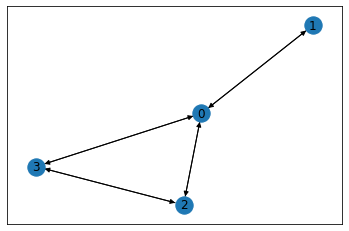

In [20]:
#plot the graph
G = to_networkx(data)
nx.draw_networkx(G)
